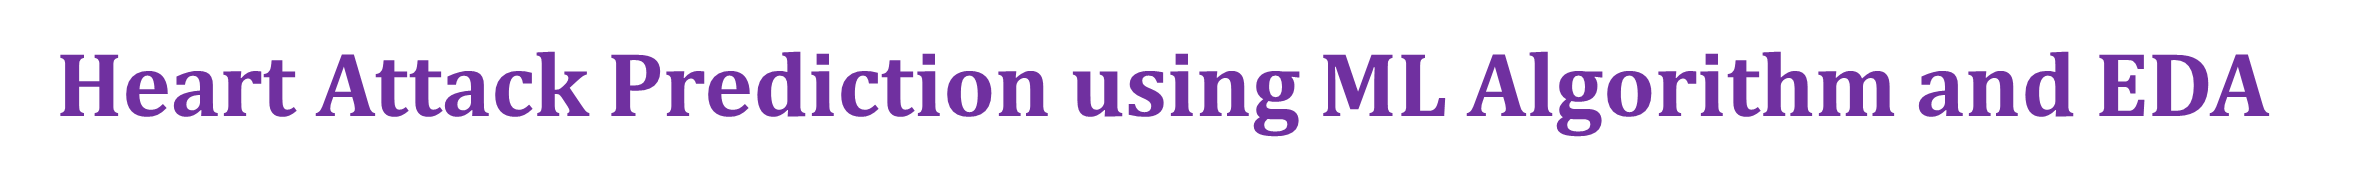

###             A heart attack occurs when an artery that sends blood and oxygen to the heart is blocked. Fatty, cholesterol-containing deposits build up over time, forming plaques in the heart's arteries. If a plaque ruptures, a blood clot can form. The clot can block arteries, causing a heart attack.

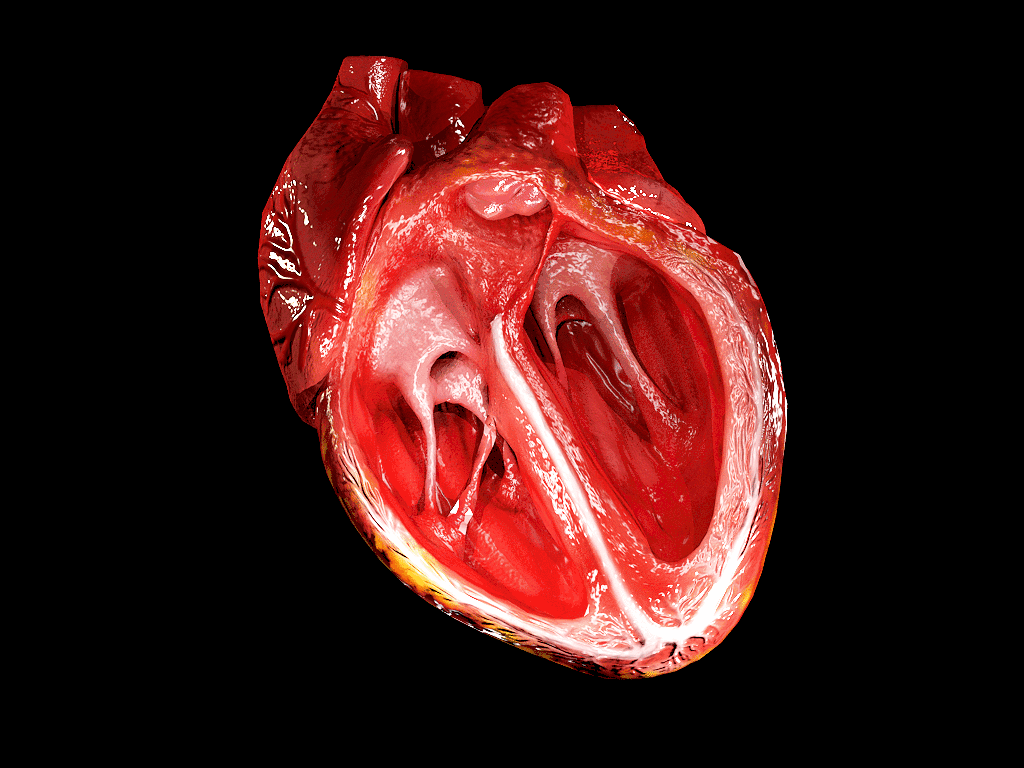

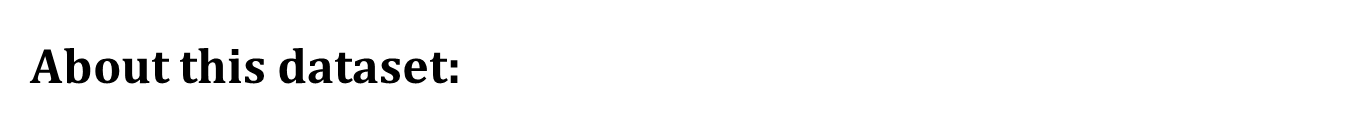

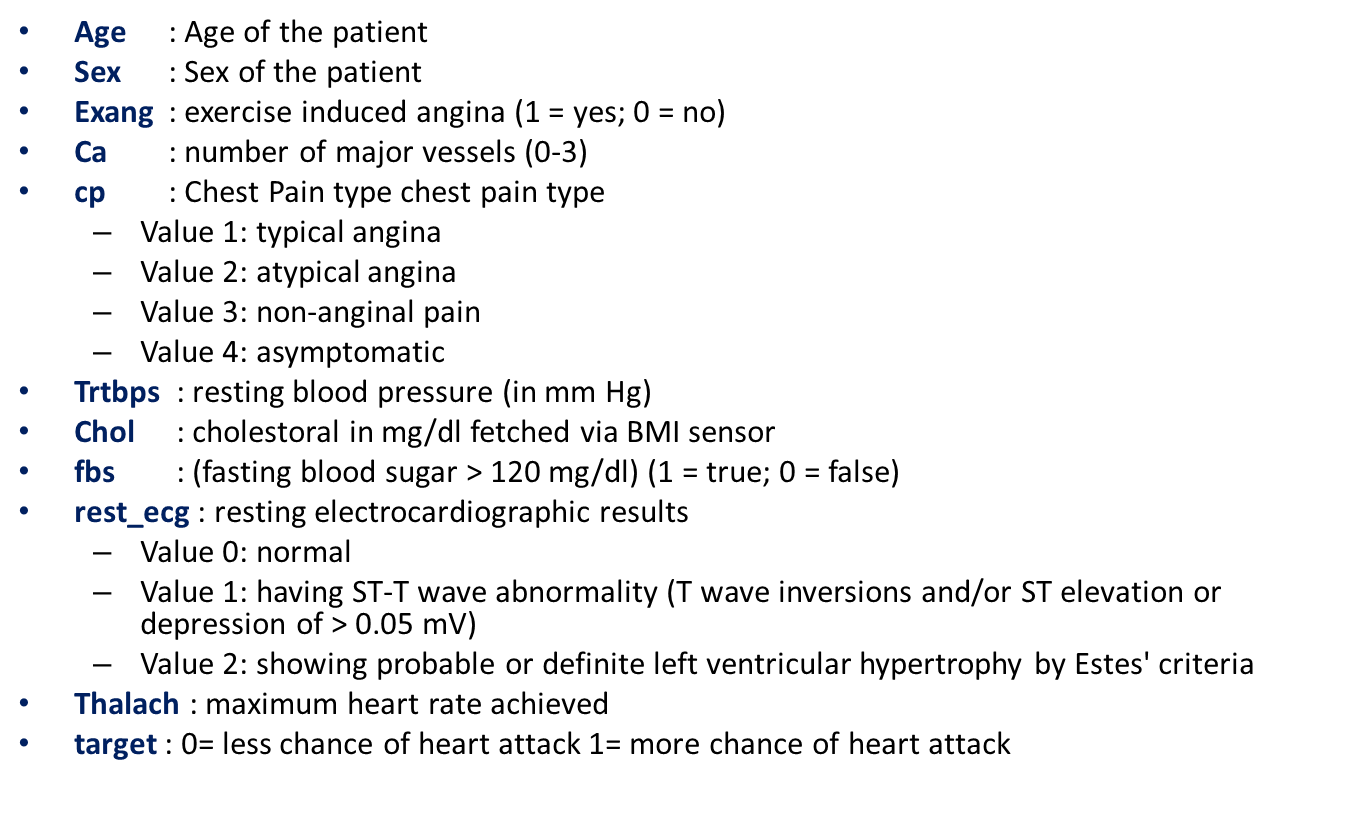

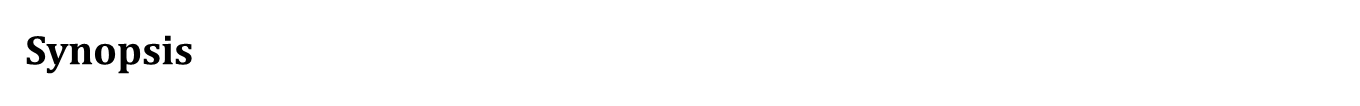

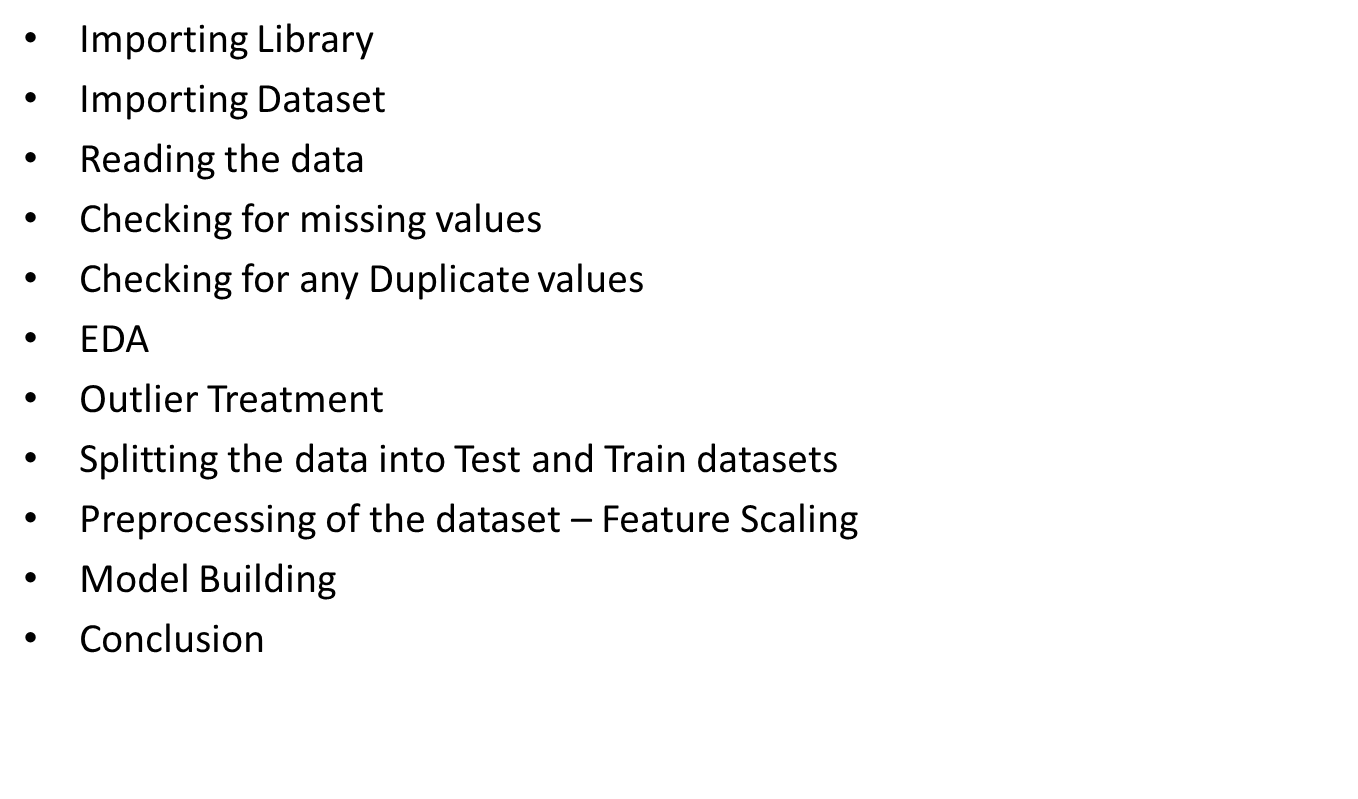

# Importing Libraries

In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
data = pd.read_csv('heart.csv')

# Reading the Dataset

In [3]:
data.head(2)

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   

   caa  thall  output  
0    0      1       1  
1    0      2       1

In [4]:
data.shape

(303, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### From the above information, it is evident that dataset has 303 rows and 14 columns, also there is no mix up of data or any symbols or any alpha characters in the data. Thus the data is clean. Also from the Non-null count it shows there is no missing value in the data. 

#### Any ways we can check it through isnull() function.

# Checking for Missing Value

In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

# Checking For any Duplicate Values

In [7]:
data.duplicated().sum()

1

In [8]:
data[data.duplicated()]

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
164   38    1   2     138   175    0        1       173     0      0.0    2   

     caa  thall  output  
164    4      2       1

In [9]:
data.drop(164,axis = 0,inplace = True)

In [10]:
data[data.duplicated()]

Empty DataFrame
Columns: [age, sex, cp, trtbps, chol, fbs, restecg, thalachh, exng, oldpeak, slp, caa, thall, output]
Index: []

#### There was one duplicate value in 164 row, it was checked and removed. Now we will have data with 302 rows and 14 columns.

In [11]:
data.shape

(302, 14)

# Exploratory Data Analysis

In [12]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

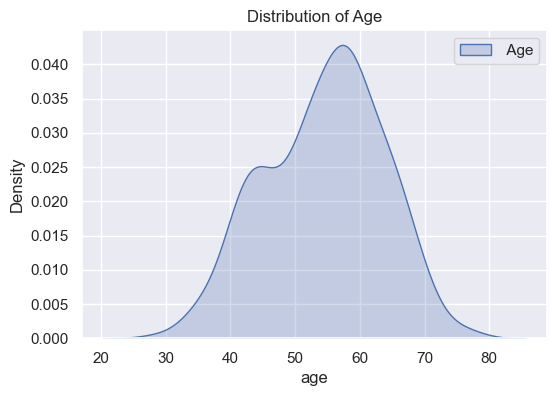

In [13]:
plt.figure(figsize=(6,4))
plt.subplot()
plt.title('Distribution of Age')
sns.kdeplot(data['age'],shade = True, label=' Age')
plt.legend()

#### The Above Graph shows, that Heart Attack is more prominent between ages 50-60years of age.

Text(0.5, 1.0, 'Gender Vs HeartAttack Target')

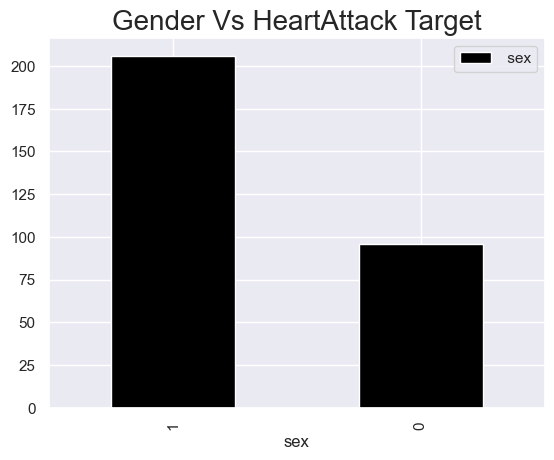

In [14]:
data['sex'].value_counts().plot(kind='bar',label=' sex', color="black")
plt.xlabel('sex')
plt.legend()
plt.title('Gender Vs HeartAttack Target',fontsize = 20,fontweight = 50)

#### From the above graph it is evident that sex gender 1 are more prominent to get heart attack.

In [16]:
group1 = pd.DataFrame(data.groupby(['sex','age']).output.count().reset_index())

In [17]:
group1.head()

sex  age  output
0    0   34       1
1    0   35       1
2    0   37       1
3    0   39       2
4    0   41       4

Text(0.5, 1.0, 'Age Vs HeartAttack basis Gender')

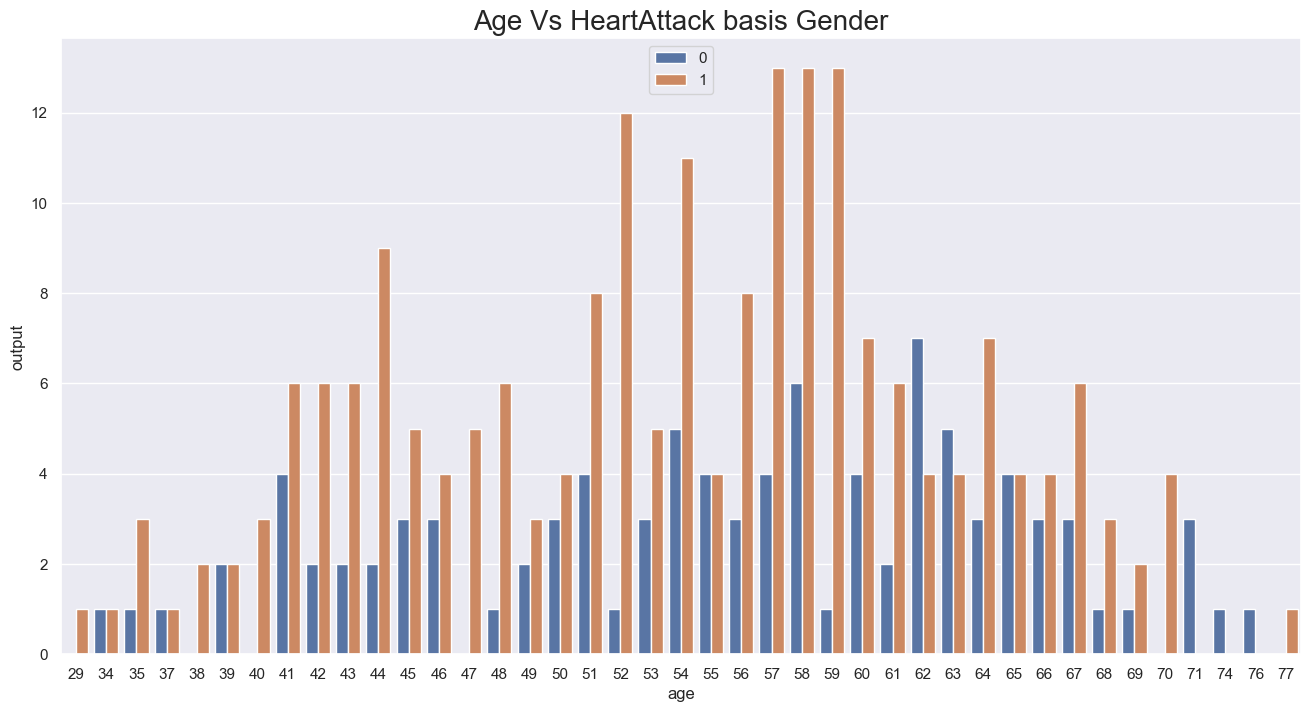

In [18]:
plt.figure(figsize=(16,8))
plt.subplot()
sns.barplot(group1,x = 'age',y = 'output',hue = 'sex')
plt.legend()
plt.title('Age Vs HeartAttack basis Gender',fontsize = 20,fontweight = 100)

#### The above graph shows the barplot with respect to age,sex and more vulnerability to get heart attack. It shows between ages 50-60 both genders has more vulnerability to get attacks. 

<AxesSubplot: >

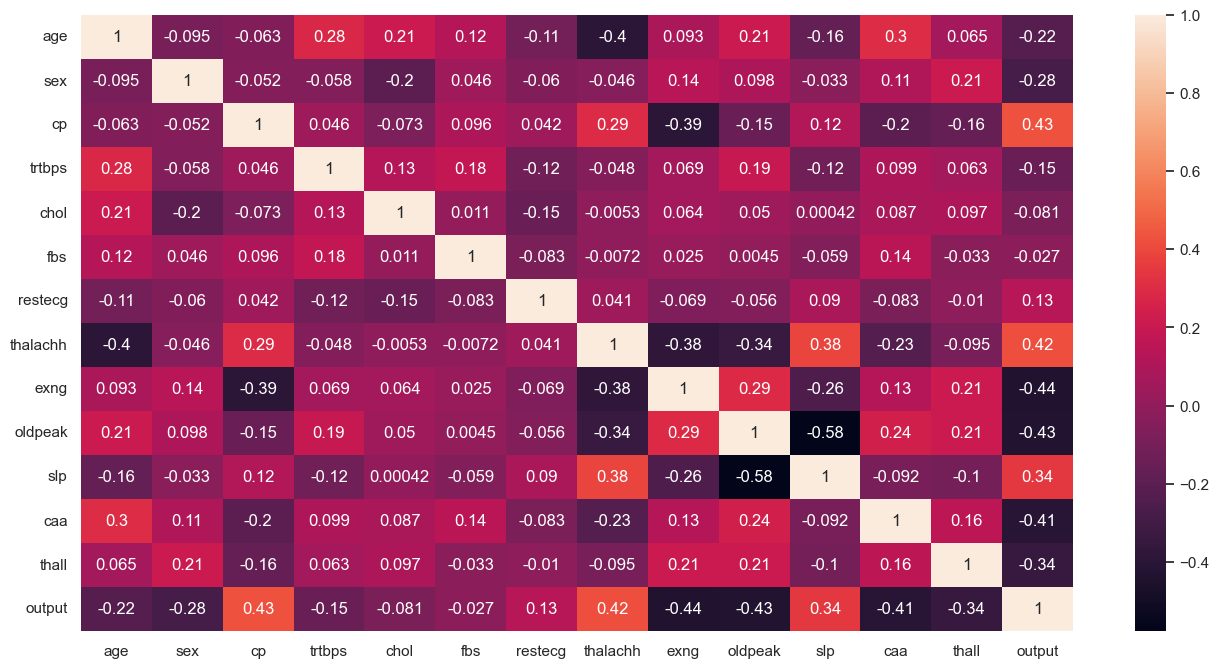

In [19]:
plt.figure(figsize=(16,8))

sns.heatmap(data.corr(),annot = True)

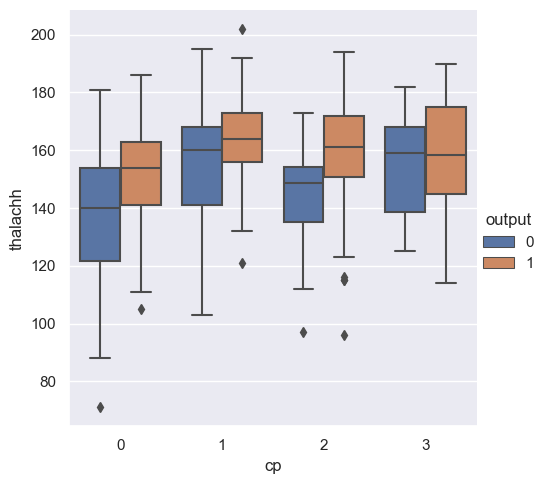

In [20]:
sns.catplot(data = data,x="cp", y="thalachh",hue='output',kind='box')

#### Higher the chest pain and higher the heart, very likely is person to suffer from heart attack.

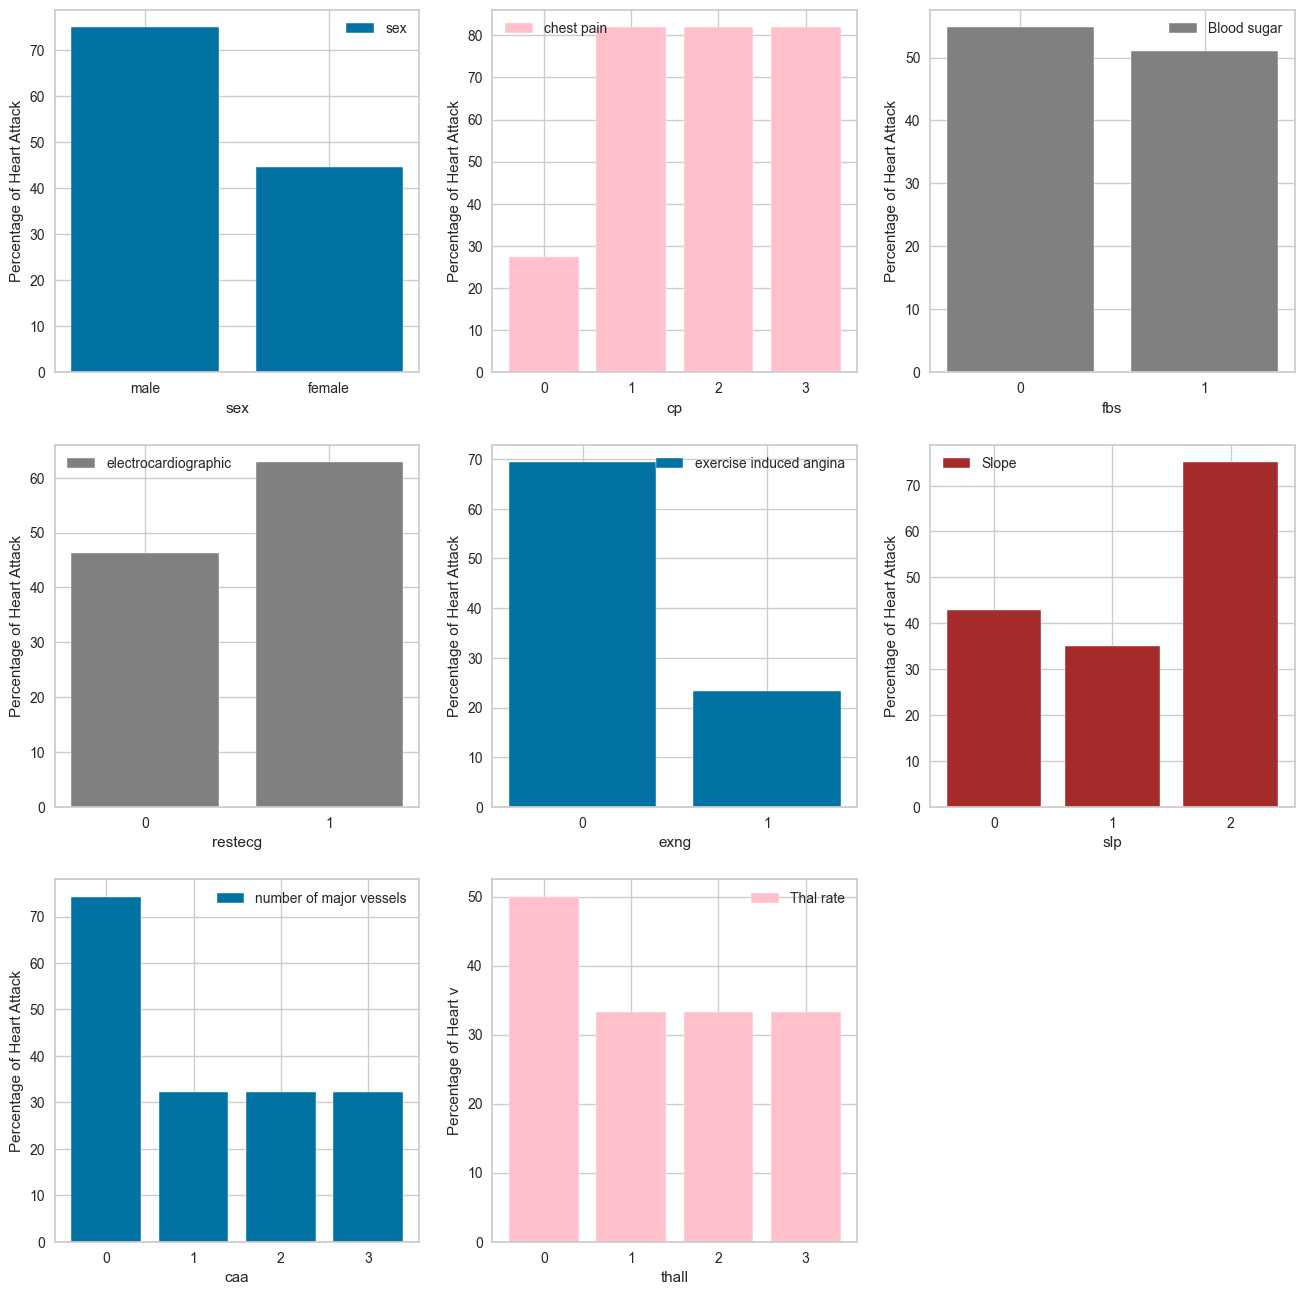

In [49]:
fig=plt.figure(figsize=(16, 16))
fig = plt.subplot(331)
df=data
name='sex'
l = [(100)*df[df[name]==0]['output'].sum()/len(df[df[name]==0]['output']),
     (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output'])]
x=["male","female"]
plt.bar(x,l,label=name )
plt.xlabel(name)
plt.ylabel('Percentage of Heart Attack')
plt.legend()
fig = plt.subplot(332)
df=data
name='cp'
l = [(100)*df[df[name]==0]['output'].sum()/len(df[df[name]==0]['output']),
     (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output']),
    (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output']),
    (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output'])]
x=["0","1",'2','3']
plt.bar(x,l,label='chest pain' , color="pink")
plt.xlabel(name)
plt.ylabel('Percentage of Heart Attack')
plt.legend()

fig = plt.subplot(333)
name='fbs'
l = [(100)*df[df[name]==0]['output'].sum()/len(df[df[name]==0]['output']),
     (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output'])]
x=["0","1"]
plt.bar(x,l,label='Blood sugar', color="grey" )
plt.xlabel(name)
plt.ylabel('Percentage of Heart Attack')
plt.legend()
fig = plt.subplot(334)
name='restecg'
l = [(100)*df[df[name]==0]['output'].sum()/len(df[df[name]==0]['output']),
     (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output'])]
x=["0","1"]
plt.bar(x,l,label='electrocardiographic' , color="grey")
plt.xlabel(name)
plt.ylabel('Percentage of Heart Attack')
plt.legend()

fig = plt.subplot(335)
name='exng'
l = [(100)*df[df[name]==0]['output'].sum()/len(df[df[name]==0]['output']),
     (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output'])]
x=["0","1"]
plt.bar(x,l,label='exercise induced angina' )
plt.xlabel(name)
plt.ylabel('Percentage of Heart Attack')
plt.legend()
fig = plt.subplot(336)
name='slp'
l = [(100)*df[df[name]==0]['output'].sum()/len(df[df[name]==0]['output']),
     (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output']),
     (100)*df[df[name]==2]['output'].sum()/len(df[df[name]==2]['output'])]
x=["0","1",'2']
plt.bar(x,l,label='Slope' , color="brown")
plt.xlabel(name)
plt.ylabel('Percentage of Heart Attack')
plt.legend()

fig = plt.subplot(337)
df=data
name='caa'
l = [(100)*df[df[name]==0]['output'].sum()/len(df[df[name]==0]['output']),
     (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output']),
    (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output']),
    (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output'])]
x=["0","1",'2','3']
plt.bar(x,l,label='number of major vessels' )
plt.xlabel(name)
plt.ylabel('Percentage of Heart Attack')
plt.legend()

fig = plt.subplot(338)
df=data
name='thall'
l = [(100)*df[df[name]==0]['output'].sum()/len(df[df[name]==0]['output']),
     (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output']),
    (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output']),
    (100)*df[df[name]==1]['output'].sum()/len(df[df[name]==1]['output'])]
x=["0","1",'2','3']
plt.bar(x,l,label='Thal rate', color="pink" )
plt.xlabel(name)
plt.ylabel('Percentage of Heart v')
plt.legend()

#### From above analysis, percentage of male getting heart attack is higher when compared to female,
#### Also person having chest pain are more likely to get heart attack,
#### Blood sugar doesn't seem to have any impact with heart attack.

In [50]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

Text(0.5, 1.0, 'Risk of Heart_Attack with Respect to Blood Sugar')

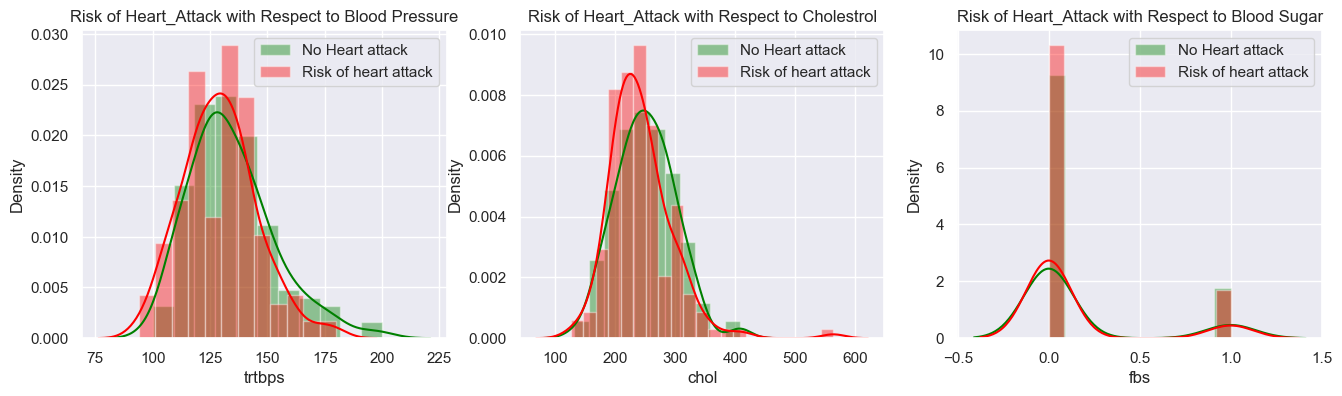

In [21]:
plt.figure(figsize = (16,4))
plt.subplot(131)
sns.distplot(data[data['output']==0]['trtbps'],kde = True,color = 'green',label = 'No Heart attack')
sns.distplot(data[data['output']==1]['trtbps'],kde = True,color = 'red', label = 'Risk of heart attack')
plt.legend()
plt.title('Risk of Heart_Attack with Respect to Blood Pressure')

plt.subplot(132)
sns.distplot(data[data['output']==0]['chol'],kde = True,color = 'green',label = 'No Heart attack')
sns.distplot(data[data['output']==1]['chol'],kde = True,color = 'red', label = 'Risk of heart attack')
plt.legend()
plt.title('Risk of Heart_Attack with Respect to Cholestrol')

plt.subplot(133)
sns.distplot(data[data['output']==0]['fbs'],kde = True,color = 'green',label = 'No Heart attack')
sns.distplot(data[data['output']==1]['fbs'],kde = True,color = 'red', label = 'Risk of heart attack')
plt.legend()
plt.title('Risk of Heart_Attack with Respect to Blood Sugar')

#### From above plot it is clear that people having blood pressure between 120 and 140 along with cholestrol level 200-300 are high likely to get Heart Attack!

In [ ]:
# from pandas_profiling import ProfileReport
# report = ProfileReport(data)
# report.to_file(output_file='HeartAttack_EDA.html')

# Checking Outlier Range

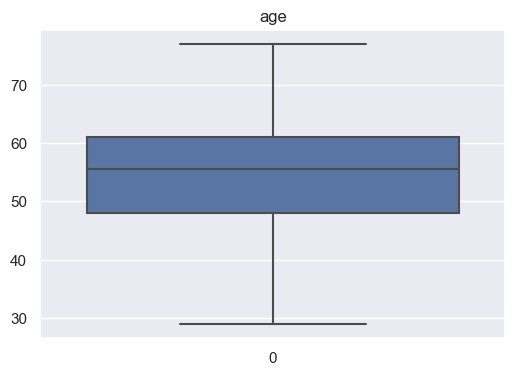

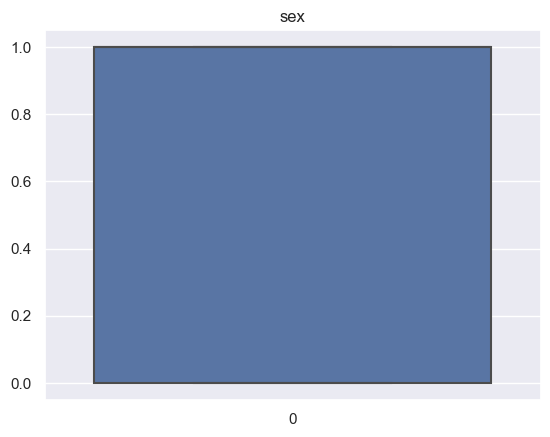

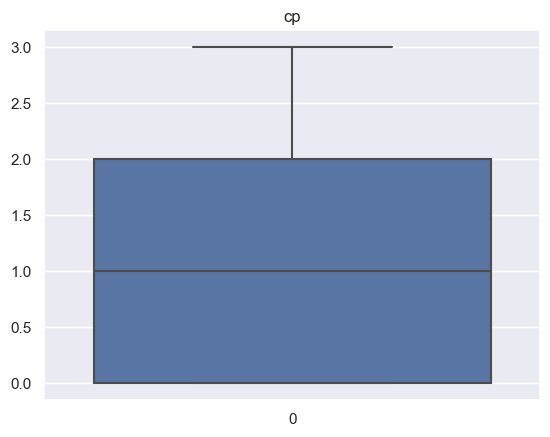

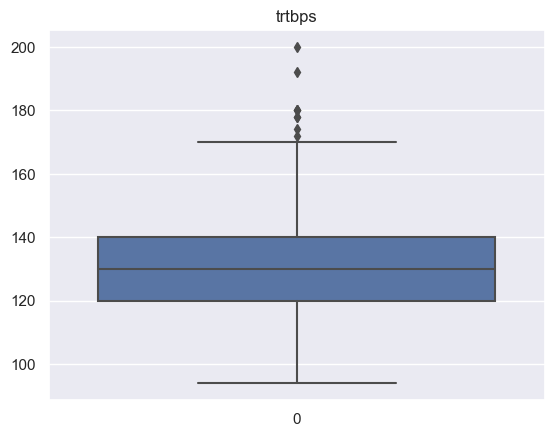

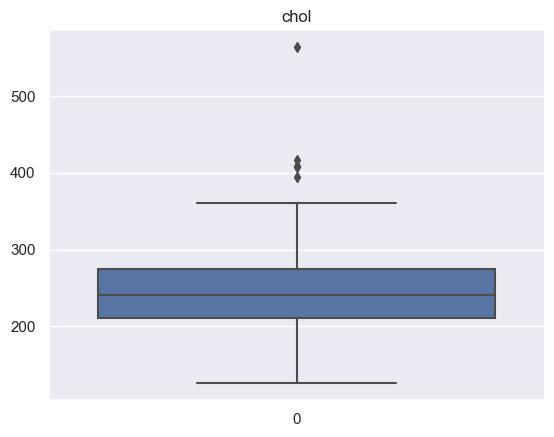

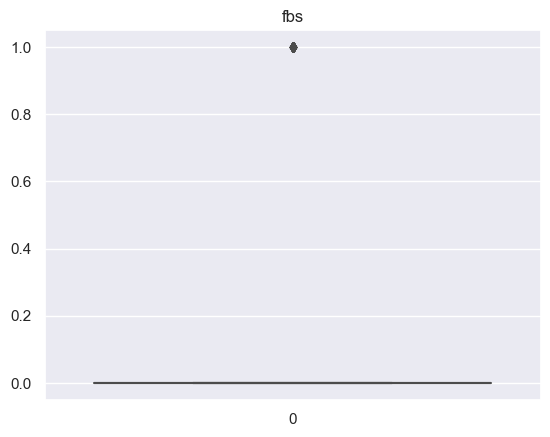

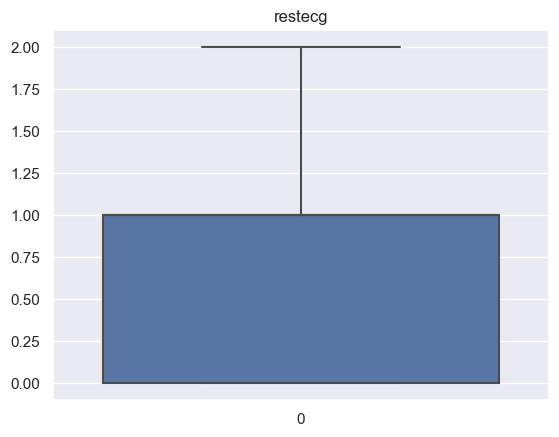

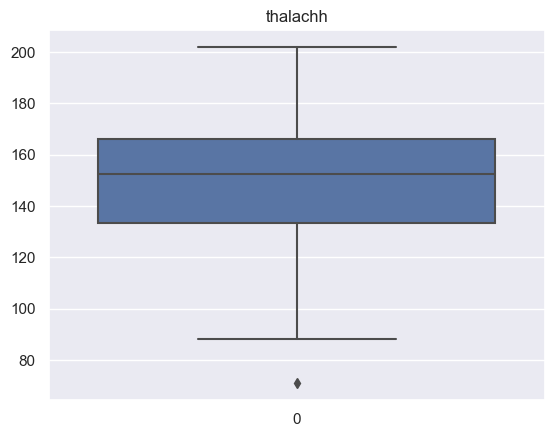

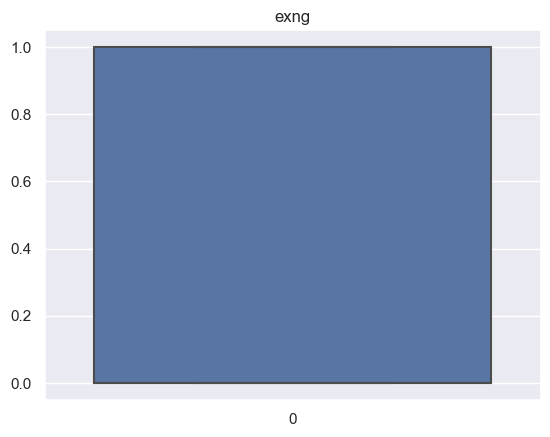

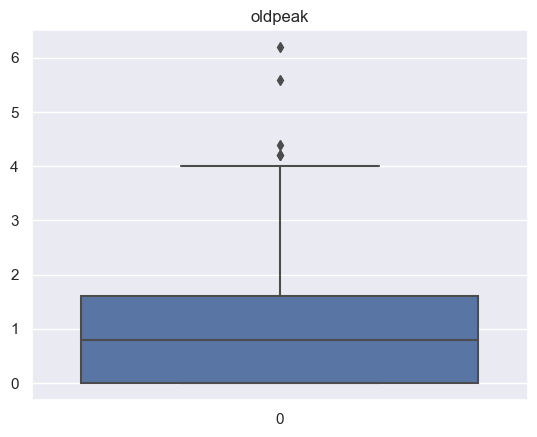

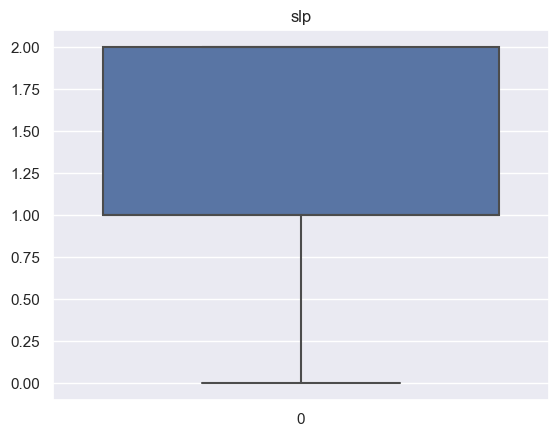

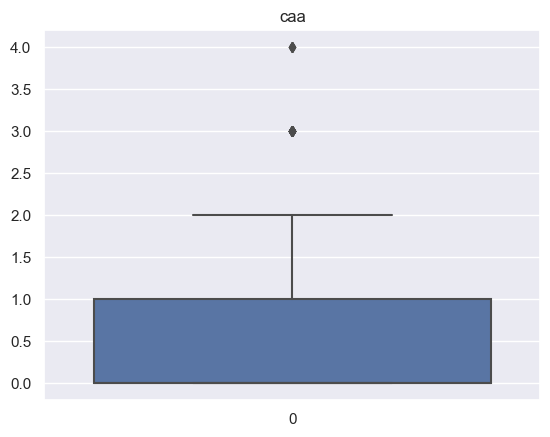

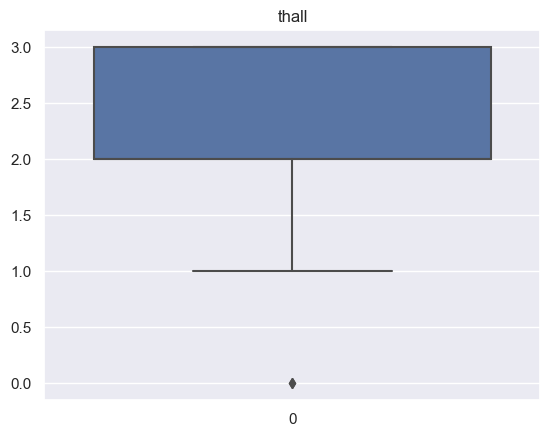

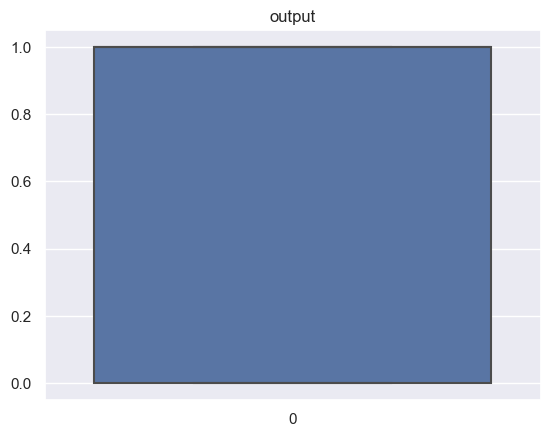

In [22]:
plt.figure(figsize = (6,4))
for i in data.columns:
    plt.title(i)
    sns.boxplot(data[i])
    plt.show()

#### From above plot analysis, there is outliers in few features like Blood Pressure, cholestrol levels,heart beat rate etc., but these outliers can be neglected as they are in particular ranges and not exceeding abnormal ranges. Also these outliers are common in Human test reports as it varies from person to person. We need to check from this data whether they are in range and not exceeding any abnormal range. Hence Outlier treatment is not done for this dataset.

# Data Preprocessing and Data Splitting into Test and Train

In [23]:
x = data.drop(['output'],axis = 1)
y = data['output']

In [24]:
x.head(2)

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   

   caa  thall  
0    0      1  
1    0      2

In [25]:
y.head(2)

0    1
1    1
Name: output, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [27]:
x_test1

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
226   62    1   1     120   281    0        0       103     0      1.4    1   
152   64    1   3     170   227    0        0       155     0      0.6    1   
229   64    1   2     125   309    0        1       131     1      1.8    1   
202   58    1   0     150   270    0        0       111     1      0.8    2   
52    62    1   2     130   231    0        1       146     0      1.8    1   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
146   44    0   2     118   242    0        1       149     0      0.3    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   
26    59    1   2     150   212    1        1       157     0      1.6    2   
108   50    0   1     120   244    0        1       162     0      1.1    2   
89    58    0   0     100   248    0        0       122     0      1.0    1   

     caa  thall  
226    1      3  
152    0      3  
229    0      3  
202    0      3  
52     3      3  
..   ...    ...  
146    1      2  
302    1      2  
26     0      2  
108    0      2  
89     0      2  

[61 rows x 13 columns]

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train1)
x_test = scaler.transform(x_test1)

In [30]:
print('Shape for training data', x_train.shape, y_train.shape)
print('Shape for testing data', x_test.shape, y_test.shape)

Shape for training data (241, 13) (241,)
Shape for testing data (61, 13) (61,)


# Pycaret Model

In [31]:
from pycaret.classification import *

In [32]:
exp_clf = setup(data=data, target='output',fold_shuffle = True,session_id = 1,preprocess = False)

In [33]:
compare_models()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
cat = create_model('catboost')

In [35]:
et = create_model('et')

In [36]:
lr = create_model('lr')

In [37]:
tuned_cat = tune_model(cat)

In [38]:
tuned_et = tune_model(et)

In [39]:
evaluate_model(tuned_cat)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [40]:
predict_model(tuned_cat)

age sex cp  trtbps   chol fbs restecg  thalachh exng  oldpeak slp caa  \
0   60.0   1  0   130.0  206.0   0       0     132.0    1      2.4   1   2   
1   54.0   0  2   110.0  214.0   0       1     158.0    0      1.6   1   0   
2   38.0   1  2   138.0  175.0   0       1     173.0    0      0.0   2   4   
3   57.0   1  0   152.0  274.0   0       1      88.0    1      1.2   1   1   
4   64.0   0  0   180.0  325.0   0       1     154.0    1      0.0   2   0   
..   ...  .. ..     ...    ...  ..     ...       ...  ...      ...  ..  ..   
86  53.0   1  0   142.0  226.0   0       0     111.0    1      0.0   2   0   
87  57.0   1  2   150.0  126.0   1       1     173.0    0      0.2   2   1   
88  51.0   1  3   125.0  213.0   0       0     125.0    1      1.4   2   1   
89  44.0   1  0   112.0  290.0   0       0     153.0    0      0.0   2   1   
90  64.0   1  0   128.0  263.0   0       1     105.0    1      0.2   1   1   

   thall output  Label   Score  
0      3      0      0  0.9757  
1      2      1      1  0.9199  
2      2      1      1  0.8099  
3      3      0      0  0.9678  
4      2      1      1  0.5900  
..   ...    ...    ...     ...  
86     3      1      0  0.7749  
87     3      1      1  0.5689  
88     2      1      0  0.5108  
89     2      0      0  0.6298  
90     3      1      0  0.9498  

[91 rows x 16 columns]

In [41]:
predict_model(tuned_et)

age sex cp  trtbps   chol fbs restecg  thalachh exng  oldpeak slp caa  \
0   60.0   1  0   130.0  206.0   0       0     132.0    1      2.4   1   2   
1   54.0   0  2   110.0  214.0   0       1     158.0    0      1.6   1   0   
2   38.0   1  2   138.0  175.0   0       1     173.0    0      0.0   2   4   
3   57.0   1  0   152.0  274.0   0       1      88.0    1      1.2   1   1   
4   64.0   0  0   180.0  325.0   0       1     154.0    1      0.0   2   0   
..   ...  .. ..     ...    ...  ..     ...       ...  ...      ...  ..  ..   
86  53.0   1  0   142.0  226.0   0       0     111.0    1      0.0   2   0   
87  57.0   1  2   150.0  126.0   1       1     173.0    0      0.2   2   1   
88  51.0   1  3   125.0  213.0   0       0     125.0    1      1.4   2   1   
89  44.0   1  0   112.0  290.0   0       0     153.0    0      0.0   2   1   
90  64.0   1  0   128.0  263.0   0       1     105.0    1      0.2   1   1   

   thall output  Label   Score  
0      3      0      0  0.9993  
1      2      1      1  0.9389  
2      2      1      1  0.7174  
3      3      0      0  0.9849  
4      2      1      0  0.7062  
..   ...    ...    ...     ...  
86     3      1      0  0.8652  
87     3      1      1  0.6676  
88     2      1      1  0.5277  
89     2      0      0  0.5789  
90     3      1      0  0.9671  

[91 rows x 16 columns]

In [42]:
from sklearn.linear_model import LogisticRegression,Ridge
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier

In [43]:
logit = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
br = BaggingClassifier()
ada = AdaBoostClassifier()
gbr = GradientBoostingClassifier()
xgb = XGBClassifier()
knn = KNeighborsClassifier()
svr = SVC()
lgm = LGBMClassifier()
cat = CatBoostClassifier()

In [44]:
model = [logit,dt,rf,br,ada,gbr,xgb,knn,svr,lgm,cat]

In [45]:
for i in model:
    print(i)
    i.fit(x_train, y_train)
    y_pred_train = i.predict(x_train)
    y_pred_test = i.predict(x_test)
    print("Confusion Matrix")
    c = confusion_matrix(y_test, y_pred_test)
    print(c)
    print('\n')
    print("classification_report")
    d = classification_report(y_test, y_pred_test)
    print(d)
    print('\n')
    print("Training Accuracy", accuracy_score(y_train, y_pred_train))
    print("****************"*5)
    print("Test Accuracy", accuracy_score(y_test, y_pred_test))
    print("__"*5)
    print('\n')
    print('\n')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Confusion Matrix
[[22  5]
 [ 3 31]]


classification_report
              precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.89        34

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



Training Accuracy 0.8506224066390041
********************************************************************************
Test Accuracy 0.8688524590163934
__________




DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_f

Confusion Matrix
[[23  4]
 [ 8 26]]


classification_report
              precision    recall  f1-score   support

           0       0.74      0.85      0.79        27
           1       0.87      0.76      0.81        34

    accuracy                           0.80        61
   macro avg       0.80      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61



Training Accuracy 1.0
********************************************************************************
Test Accuracy 0.8032786885245902
__________




Learning rate set to 0.005611
0:	learn: 0.6886488	total: 9.02ms	remaining: 9.01s
1:	learn: 0.6849373	total: 16.5ms	remaining: 8.21s
2:	learn: 0.6815845	total: 21ms	remaining: 6.99s
3:	learn: 0.6767195	total: 24.9ms	remaining: 6.2s
4:	learn: 0.6730485	total: 29.4ms	remaining: 5.84s
5:	learn: 0.6683141	total: 33.1ms	remaining: 5.48s
6:	learn: 0.6651151	total: 36.9ms	remaining: 5.24s
7:	learn: 0.6608247	total: 40.6ms	remaining: 5.04s
8:	learn: 0.6566367	total

171:	learn: 0.3392138	total: 433ms	remaining: 2.08s
172:	learn: 0.3383870	total: 436ms	remaining: 2.08s
173:	learn: 0.3373004	total: 438ms	remaining: 2.08s
174:	learn: 0.3365676	total: 441ms	remaining: 2.08s
175:	learn: 0.3354103	total: 443ms	remaining: 2.08s
176:	learn: 0.3341614	total: 446ms	remaining: 2.07s
177:	learn: 0.3334744	total: 449ms	remaining: 2.07s
178:	learn: 0.3325723	total: 451ms	remaining: 2.07s
179:	learn: 0.3316306	total: 454ms	remaining: 2.07s
180:	learn: 0.3311656	total: 456ms	remaining: 2.06s
181:	learn: 0.3302631	total: 459ms	remaining: 2.06s
182:	learn: 0.3293124	total: 461ms	remaining: 2.06s
183:	learn: 0.3286061	total: 464ms	remaining: 2.06s
184:	learn: 0.3274904	total: 466ms	remaining: 2.05s
185:	learn: 0.3267393	total: 468ms	remaining: 2.05s
186:	learn: 0.3257644	total: 471ms	remaining: 2.05s
187:	learn: 0.3253943	total: 472ms	remaining: 2.04s
188:	learn: 0.3249434	total: 474ms	remaining: 2.04s
189:	learn: 0.3242736	total: 477ms	remaining: 2.03s
190:	learn: 

330:	learn: 0.2419119	total: 816ms	remaining: 1.65s
331:	learn: 0.2414013	total: 819ms	remaining: 1.65s
332:	learn: 0.2410401	total: 821ms	remaining: 1.65s
333:	learn: 0.2405372	total: 824ms	remaining: 1.64s
334:	learn: 0.2401856	total: 827ms	remaining: 1.64s
335:	learn: 0.2397784	total: 830ms	remaining: 1.64s
336:	learn: 0.2395206	total: 833ms	remaining: 1.64s
337:	learn: 0.2389930	total: 836ms	remaining: 1.64s
338:	learn: 0.2386160	total: 839ms	remaining: 1.64s
339:	learn: 0.2379917	total: 841ms	remaining: 1.63s
340:	learn: 0.2376338	total: 843ms	remaining: 1.63s
341:	learn: 0.2370813	total: 846ms	remaining: 1.63s
342:	learn: 0.2366747	total: 848ms	remaining: 1.63s
343:	learn: 0.2362757	total: 851ms	remaining: 1.62s
344:	learn: 0.2357137	total: 853ms	remaining: 1.62s
345:	learn: 0.2352549	total: 856ms	remaining: 1.62s
346:	learn: 0.2347881	total: 858ms	remaining: 1.61s
347:	learn: 0.2345195	total: 860ms	remaining: 1.61s
348:	learn: 0.2341161	total: 863ms	remaining: 1.61s
349:	learn: 

546:	learn: 0.1774899	total: 1.39s	remaining: 1.15s
547:	learn: 0.1772876	total: 1.39s	remaining: 1.15s
548:	learn: 0.1770627	total: 1.39s	remaining: 1.15s
549:	learn: 0.1767391	total: 1.4s	remaining: 1.15s
550:	learn: 0.1766345	total: 1.41s	remaining: 1.14s
551:	learn: 0.1762728	total: 1.41s	remaining: 1.14s
552:	learn: 0.1761161	total: 1.41s	remaining: 1.14s
553:	learn: 0.1756757	total: 1.42s	remaining: 1.14s
554:	learn: 0.1755486	total: 1.42s	remaining: 1.14s
555:	learn: 0.1753234	total: 1.42s	remaining: 1.14s
556:	learn: 0.1750508	total: 1.42s	remaining: 1.13s
557:	learn: 0.1749214	total: 1.43s	remaining: 1.13s
558:	learn: 0.1746717	total: 1.43s	remaining: 1.13s
559:	learn: 0.1744318	total: 1.44s	remaining: 1.13s
560:	learn: 0.1742616	total: 1.44s	remaining: 1.13s
561:	learn: 0.1740854	total: 1.45s	remaining: 1.13s
562:	learn: 0.1738996	total: 1.45s	remaining: 1.13s
563:	learn: 0.1736180	total: 1.45s	remaining: 1.12s
564:	learn: 0.1734715	total: 1.46s	remaining: 1.12s
565:	learn: 0

758:	learn: 0.1374926	total: 1.96s	remaining: 621ms
759:	learn: 0.1373453	total: 1.96s	remaining: 619ms
760:	learn: 0.1372718	total: 1.96s	remaining: 616ms
761:	learn: 0.1369790	total: 1.97s	remaining: 614ms
762:	learn: 0.1367471	total: 1.97s	remaining: 611ms
763:	learn: 0.1365926	total: 1.97s	remaining: 609ms
764:	learn: 0.1364583	total: 1.97s	remaining: 606ms
765:	learn: 0.1362460	total: 1.98s	remaining: 604ms
766:	learn: 0.1361626	total: 1.98s	remaining: 601ms
767:	learn: 0.1360465	total: 1.98s	remaining: 599ms
768:	learn: 0.1357337	total: 1.98s	remaining: 596ms
769:	learn: 0.1354908	total: 1.99s	remaining: 594ms
770:	learn: 0.1353175	total: 1.99s	remaining: 591ms
771:	learn: 0.1351548	total: 1.99s	remaining: 588ms
772:	learn: 0.1349109	total: 1.99s	remaining: 586ms
773:	learn: 0.1348091	total: 2s	remaining: 583ms
774:	learn: 0.1346132	total: 2s	remaining: 581ms
775:	learn: 0.1344182	total: 2s	remaining: 578ms
776:	learn: 0.1343077	total: 2s	remaining: 575ms
777:	learn: 0.1340501	to

923:	learn: 0.1146075	total: 2.34s	remaining: 193ms
924:	learn: 0.1144365	total: 2.34s	remaining: 190ms
925:	learn: 0.1142435	total: 2.35s	remaining: 187ms
926:	learn: 0.1140769	total: 2.35s	remaining: 185ms
927:	learn: 0.1139462	total: 2.35s	remaining: 182ms
928:	learn: 0.1138356	total: 2.35s	remaining: 180ms
929:	learn: 0.1136697	total: 2.35s	remaining: 177ms
930:	learn: 0.1135692	total: 2.36s	remaining: 175ms
931:	learn: 0.1134535	total: 2.36s	remaining: 172ms
932:	learn: 0.1133332	total: 2.36s	remaining: 170ms
933:	learn: 0.1131524	total: 2.37s	remaining: 167ms
934:	learn: 0.1130584	total: 2.37s	remaining: 165ms
935:	learn: 0.1129470	total: 2.37s	remaining: 162ms
936:	learn: 0.1127491	total: 2.37s	remaining: 160ms
937:	learn: 0.1125926	total: 2.38s	remaining: 157ms
938:	learn: 0.1125076	total: 2.38s	remaining: 154ms
939:	learn: 0.1123504	total: 2.38s	remaining: 152ms
940:	learn: 0.1122078	total: 2.38s	remaining: 149ms
941:	learn: 0.1120608	total: 2.38s	remaining: 147ms
942:	learn: 

In [46]:
knn1 = KNeighborsClassifier(n_neighbors=7)
knn1.fit(x_train, y_train)
y_pred_train = knn1.predict(x_train)
y_pred_test = knn1.predict(x_test)
print("Confusion Matrix")
c = confusion_matrix(y_test, y_pred_test)
print(c)
print('\n')
print("classification_report")
d = classification_report(y_test, y_pred_test)
print(d)
print('\n')
print("Training Accuracy", accuracy_score(y_train, y_pred_train))
print("****************"*5)
print("Test Accuracy", accuracy_score(y_test
                                      , y_pred_test))
print("__"*5)
print('\n')
print('\n')

Confusion Matrix
[[25  2]
 [ 3 31]]


classification_report
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        27
           1       0.94      0.91      0.93        34

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



Training Accuracy 0.8423236514522822
********************************************************************************
Test Accuracy 0.9180327868852459
__________






In [47]:
ada = AdaBoostClassifier(n_estimators =50,random_state = 101)

ada.fit(x_train, y_train)
y_pred_train = ada.predict(x_train)
y_pred_test = ada.predict(x_test)
print("Confusion Matrix")
c = confusion_matrix(y_test, y_pred_test)
print(c)
print('\n')
print("classification_report") 
d = classification_report(y_test, y_pred_test)
print(d)
print('\n')
print("Training Accuracy", accuracy_score(y_train, y_pred_train))
print("****************"*5)
print("Test Accuracy", accuracy_score(y_test, y_pred_test))

Confusion Matrix
[[25  2]
 [ 3 31]]


classification_report
              precision    recall  f1-score   support

           0       0.89      0.93      0.91        27
           1       0.94      0.91      0.93        34

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



Training Accuracy 0.921161825726141
********************************************************************************
Test Accuracy 0.9180327868852459


In [48]:
svc = SVC(random_state = 101)
svc.fit(x_train, y_train)
y_pred_train = svc.predict(x_train)
y_pred_test = svc.predict(x_test)
print("Confusion Matrix")
c = confusion_matrix(y_test, y_pred_test)
print(c)
print('\n')
print("classification_report")
d = classification_report(y_test, y_pred_test)
print(d)
print('\n')
print("Training Accuracy", accuracy_score(y_train, y_pred_train))
print("****************"*5)
print("Test Accuracy", accuracy_score(y_test
                                      , y_pred_test))
print("__"*5)
print('\n')
print('\n')

Confusion Matrix
[[26  1]
 [ 3 31]]


classification_report
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        27
           1       0.97      0.91      0.94        34

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61



Training Accuracy 0.9087136929460581
********************************************************************************
Test Accuracy 0.9344262295081968
__________






### Conclusion:
    
#### Support Vector Machine and ADA Boost Classifier Algorithm gives best results in terms of model prediction, as there is no bias, and both testing accuracy and Training accuracy matches.

#### Accuracy is 93.4% 

#### Precision is 93%

#### Recall is 94%

#### F1_score is 93%
    

Kaggle URL:
    
https://www.kaggle.com/preethamkumarj/heart-attack-prediction-with-93-4-accuracy